# LISTA DE EXERCÍCIOS 1 – REGRESSÃO

> Os exercícios abaixo referem-se a base de dados “Risco de ataque cardíaco”

1) Obtenha o modelo utilizando os 10 primeiros exemplos da base de dados. Calcule e apresente o erro quadrático médio aplicando o modelo de regressão nos mesmos 10 primeiros exemplos da base de dados. Depois calcule e apresente o erro quadrático médio do modelo de regressão obtido nos demais exemplos. Argumente se o modelo tem ou não uma boa capacidade de predição em novos exemplos.

* Y = modelo
* Y = B0+B1 * X + E
* B1 = SOMA(X*Y)/SOMA(X*X)
* B0 = MEDIA(Y) - B1 * MEDIA (X)
* R² = (Exy)² / ExxEyy
* EQM: SOMA(Erros)² / N


In [ ]:
# 1) Obtenha o modelo utilizando os 10 primeiros exemplos da base de dados.
# 2) Calcule e apresente o erro quadrático médio aplicando o modelo de regressão nos mesmos 10 primeiros exemplos da base de dados.
# 3) Calcule e apresente o erro quadrático médio do modelo de regressão obtido nos demais exemplos.
# 4) Argumente se o modelo tem ou não uma boa capacidade de predição em novos exemplos.

# Y = modelo
# Y = B0+B1 * X + E
# B1 = SOMA(XY)/SOMA(XX)
# B0 = MEDIA(Y) - B1 * MEDIA (X)
# R² = (Exy)² / ExxEyy
# EQM: SOMA(Erros)² / N
import pandas as pd
import 

def formatColumns(df):
    df['ProbAtaqueCardiaco'] = df['ProbAtaqueCardiaco'].str.replace(',', '.').astype('str').astype(float)
    return df


def readFile(fileName):
    return formatColumns(pd.read_csv(fileName, sep=";"))
    # return formatColumns(pd.read_csv(fileName, sep=";")).tail(10)


df = readFile('csv/risco_ataque_cardiaco.csv')


def estimateXY(df):
    df['X*Y'] = df['Idade'] * df['ProbAtaqueCardiaco']
    return df


def estimateXX(df):
    df['X*X'] = df['Idade'] ** 2
    return df

def summaryHeader(somatorioXY, somatorioXX, b0, b1, eqm):
    print("""
            * Somatório de X*X:     %(somatorioXX)s 
            * Somatório de X*Y:     %(somatorioXY)s
            * B0:                   %(b0)s
            * B1:                   %(b1)s
            * EQM:                  %(eqm)s
            """ % {'somatorioXX': somatorioXX, 'somatorioXY': somatorioXY, 'b0': b0, 'b1': b1, 'eqm': eqm})

def summaryDetail(df):
    print(str(df) + "\n")

def summary(df, somatorioXY, somatorioXX, b0, b1, eqm):
    summaryHeader(somatorioXY, somatorioXX, b0, b1, eqm)
    summaryDetail(df)

def plotarDados(df):
    df.plot.scatter(x='Idade', y='ProbAtaqueCardiaco')

def estimateModel():
    global df
    df10Primeiros = df.iloc[:-10].copy()
    df10Ultimos = df.tail(10).copy()
    estimateXY(df10Primeiros)
    estimateXX(df10Primeiros)
    somatorioXX = df10Primeiros['X*X'].sum()
    somatorioXY = df10Primeiros['X*Y'].sum()
    mediaX = sum(df10Primeiros['Idade']) / float(len(df10Primeiros['Idade']))
    mediaY = sum(df10Primeiros['ProbAtaqueCardiaco']) / float(len(df10Primeiros['ProbAtaqueCardiaco']))
    b1 = somatorioXY / somatorioXX
    b0 = mediaY - b1 * mediaX

    df10Primeiros['modelo'] = b0 + b1 * df10Primeiros['Idade']
    df10Ultimos['modelo'] = b0 + b1 * df10Ultimos['Idade']

    df10Primeiros['erro'] = df10Primeiros['ProbAtaqueCardiaco'] - df10Primeiros['modelo']
    df10Ultimos['erro'] = df10Ultimos['ProbAtaqueCardiaco'] - df10Ultimos['modelo']

    eqm10Primeiros = df10Primeiros['erro'].sum() ** 2 / 10
    eqm10Ultimos = df10Ultimos['erro'].sum() ** 2 / 10

    summary(df10Primeiros, somatorioXY, somatorioXX, b0, b1, eqm10Primeiros)
    summaryDetail(df10Ultimos)
    summaryDetail("EQM 10 últimos valores: "+str(eqm10Ultimos))
    plotarDados(df10Primeiros)

estimateModel()

In [2]:
import numpy as np
from mayavi import mlab

X = np.array([0, 1, 0, 1, 0.75])
Y = np.array([0, 0, 1, 1, 0.75])
Z = np.array([1, 1, 1, 1, 2])

# Define the points in 3D space
# including color code based on Z coordinate.
pts = mlab.points3d(X, Y, Z, Z)

# Triangulate based on X, Y with Delaunay 2D algorithm.
# Save resulting triangulation.
mesh = mlab.pipeline.delaunay2d(pts)

# Remove the point representation from the plot
pts.remove()

# Draw a surface based on the triangulation
surf = mlab.pipeline.surface(mesh)

# Simple plot.
mlab.xlabel("x")
mlab.ylabel("y")
mlab.zlabel("z")
mlab.show()

ModuleNotFoundError: No module named 'mayavi'

In [3]:
import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy
from numpy.random import randn
from scipy import array, newaxis


# ======
## data:

DATA = array([
   [7.95,6.00,0.0000000000000],
[7.95,6.15,0.0000000000000],
[7.95,6.30,0.0000000000000],
[7.95,6.45,0.0000000000000],
[7.95,6.60,0.0000000000000],
[7.95,6.75,0.0000000000000],
[7.95,6.90,0.0000000000000]
])

Xs = DATA[:,0]
Ys = DATA[:,1]
Zs = DATA[:,2]


# ======
## plot:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)


fig.tight_layout()

plt.show() # or:
# fig.savefig('3D.png')

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

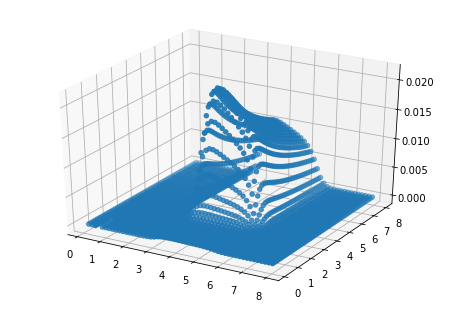

In [6]:
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D


fig = pylab.figure()
ax = Axes3D(fig)

x=[0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.15,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.30,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.45,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.60,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.75,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
0.90,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.05,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.20,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.35,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.50,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.65,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.80,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
1.95,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.10,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.25,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.40,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.55,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.70,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
2.85,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.00,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.15,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.30,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.45,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.60,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.75,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
3.90,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.05,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.20,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.35,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.50,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.65,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.80,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
4.95,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.10,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.25,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.40,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.55,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.70,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
5.85,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.00,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.15,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.30,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.45,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.60,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.75,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
6.90,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.05,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.20,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.35,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.50,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.65,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.80,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95,
7.95
]
y=[0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
0.15,
0.30,
0.45,
0.60,
0.75,
0.90,
1.05,
1.20,
1.35,
1.50,
1.65,
1.80,
1.95,
2.10,
2.25,
2.40,
2.55,
2.70,
2.85,
3.00,
3.15,
3.30,
3.45,
3.60,
3.75,
3.90,
4.05,
4.20,
4.35,
4.50,
4.65,
4.80,
4.95,
5.10,
5.25,
5.40,
5.55,
5.70,
5.85,
6.00,
6.15,
6.30,
6.45,
6.60,
6.75,
6.90,
7.05,
7.20,
7.35,
7.50,
7.65,
7.80,
7.95,
]
z=[0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000001,
0.0000000000001,
0.0000000000002,
0.0000000000004,
0.0000000000007,
0.0000000000012,
0.0000000000016,
0.0000000000019,
0.0000000000021,
0.0000000000021,
0.0000000000021,
0.0000000000020,
0.0000000000019,
0.0000000000019,
0.0000000000018,
0.0000000000018,
0.0000000000017,
0.0000000000017,
0.0000000000016,
0.0000000000016,
0.0000000000015,
0.0000000000015,
0.0000000000014,
0.0000000000014,
0.0000000000014,
0.0000000000013,
0.0000000000013,
0.0000000000013,
0.0000000000012,
0.0000000000012,
0.0000000000012,
0.0000000000012,
0.0000000000011,
0.0000000000011,
0.0000000000011,
0.0000000000011,
0.0000000000011,
0.0000000000010,
0.0000000000007,
0.0000000000004,
0.0000000000002,
0.0000000000002,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000002,
0.0000000000002,
0.0000000000003,
0.0000000000004,
0.0000000000006,
0.0000000000010,
0.0000000000017,
0.0000000000030,
0.0000000000054,
0.0000000000092,
0.0000000000146,
0.0000000000202,
0.0000000000241,
0.0000000000260,
0.0000000000264,
0.0000000000260,
0.0000000000253,
0.0000000000245,
0.0000000000237,
0.0000000000230,
0.0000000000222,
0.0000000000215,
0.0000000000209,
0.0000000000203,
0.0000000000197,
0.0000000000191,
0.0000000000186,
0.0000000000181,
0.0000000000177,
0.0000000000172,
0.0000000000168,
0.0000000000164,
0.0000000000160,
0.0000000000157,
0.0000000000153,
0.0000000000150,
0.0000000000147,
0.0000000000144,
0.0000000000141,
0.0000000000138,
0.0000000000135,
0.0000000000133,
0.0000000000130,
0.0000000000081,
0.0000000000039,
0.0000000000026,
0.0000000000019,
0.0000000000016,
0.0000000000014,
0.0000000000013,
0.0000000000013,
0.0000000000013,
0.0000000000015,
0.0000000000018,
0.0000000000023,
0.0000000000032,
0.0000000000046,
0.0000000000070,
0.0000000000114,
0.0000000000193,
0.0000000000340,
0.0000000000603,
0.0000000001039,
0.0000000001643,
0.0000000002267,
0.0000000002714,
0.0000000002923,
0.0000000002966,
0.0000000002923,
0.0000000002846,
0.0000000002758,
0.0000000002669,
0.0000000002582,
0.0000000002500,
0.0000000002422,
0.0000000002349,
0.0000000002280,
0.0000000002215,
0.0000000002153,
0.0000000002095,
0.0000000002040,
0.0000000001988,
0.0000000001938,
0.0000000001891,
0.0000000001846,
0.0000000001803,
0.0000000001762,
0.0000000001723,
0.0000000001685,
0.0000000001649,
0.0000000001615,
0.0000000001582,
0.0000000001550,
0.0000000001520,
0.0000000001491,
0.0000000001463,
0.0000000000809,
0.0000000000395,
0.0000000000258,
0.0000000000192,
0.0000000000156,
0.0000000000136,
0.0000000000126,
0.0000000000126,
0.0000000000134,
0.0000000000151,
0.0000000000182,
0.0000000000234,
0.0000000000318,
0.0000000000461,
0.0000000000707,
0.0000000001144,
0.0000000001940,
0.0000000003405,
0.0000000006043,
0.0000000010416,
0.0000000016468,
0.0000000022730,
0.0000000027209,
0.0000000029311,
0.0000000029736,
0.0000000029310,
0.0000000028536,
0.0000000027651,
0.0000000026755,
0.0000000025888,
0.0000000025063,
0.0000000024285,
0.0000000023551,
0.0000000022859,
0.0000000022206,
0.0000000021589,
0.0000000021006,
0.0000000020453,
0.0000000019929,
0.0000000019430,
0.0000000018956,
0.0000000018505,
0.0000000018075,
0.0000000017664,
0.0000000017271,
0.0000000016896,
0.0000000016536,
0.0000000016192,
0.0000000015861,
0.0000000015544,
0.0000000015239,
0.0000000014946,
0.0000000014664,
0.0000000007210,
0.0000000003522,
0.0000000002299,
0.0000000001710,
0.0000000001386,
0.0000000001209,
0.0000000001127,
0.0000000001122,
0.0000000001191,
0.0000000001347,
0.0000000001623,
0.0000000002082,
0.0000000002839,
0.0000000004110,
0.0000000006302,
0.0000000010197,
0.0000000017293,
0.0000000030356,
0.0000000053882,
0.0000000092866,
0.0000000146831,
0.0000000202658,
0.0000000242590,
0.0000000261333,
0.0000000265121,
0.0000000261328,
0.0000000254425,
0.0000000246532,
0.0000000238544,
0.0000000230814,
0.0000000223463,
0.0000000216520,
0.0000000209975,
0.0000000203806,
0.0000000197986,
0.0000000192488,
0.0000000187286,
0.0000000182357,
0.0000000177682,
0.0000000173240,
0.0000000169014,
0.0000000164990,
0.0000000161153,
0.0000000157490,
0.0000000153991,
0.0000000150643,
0.0000000147438,
0.0000000144366,
0.0000000141420,
0.0000000138592,
0.0000000135874,
0.0000000133261,
0.0000000130747,
0.0000000057047,
0.0000000027867,
0.0000000018194,
0.0000000013527,
0.0000000010970,
0.0000000009565,
0.0000000008920,
0.0000000008878,
0.0000000009423,
0.0000000010660,
0.0000000012845,
0.0000000016474,
0.0000000022463,
0.0000000032519,
0.0000000049863,
0.0000000080680,
0.0000000136825,
0.0000000240183,
0.0000000426320,
0.0000000734774,
0.0000001161754,
0.0000001603466,
0.0000001919413,
0.0000002067710,
0.0000002097680,
0.0000002067668,
0.0000002013054,
0.0000001950601,
0.0000001887402,
0.0000001826238,
0.0000001768076,
0.0000001713142,
0.0000001661361,
0.0000001612552,
0.0000001566501,
0.0000001522996,
0.0000001481837,
0.0000001442842,
0.0000001405847,
0.0000001370701,
0.0000001337269,
0.0000001305430,
0.0000001275071,
0.0000001246092,
0.0000001218401,
0.0000001191914,
0.0000001166554,
0.0000001142251,
0.0000001118940,
0.0000001096561,
0.0000001075060,
0.0000001054385,
0.0000001034491,
0.0000000399603,
0.0000000195204,
0.0000000127444,
0.0000000094751,
0.0000000076845,
0.0000000067003,
0.0000000062481,
0.0000000062189,
0.0000000066010,
0.0000000074675,
0.0000000089980,
0.0000000115398,
0.0000000157352,
0.0000000227788,
0.0000000349283,
0.0000000565152,
0.0000000958444,
0.0000001682447,
0.0000002986317,
0.0000005146995,
0.0000008137929,
0.0000011232065,
0.0000013445234,
0.0000014484031,
0.0000014693971,
0.0000014483742,
0.0000014101172,
0.0000013663701,
0.0000013221001,
0.0000012792553,
0.0000012385139,
0.0000012000330,
0.0000011637614,
0.0000011295712,
0.0000010973131,
0.0000010668382,
0.0000010380070,
0.0000010106919,
0.0000009847770,
0.0000009601577,
0.0000009367393,
0.0000009144360,
0.0000008931700,
0.0000008728707,
0.0000008534736,
0.0000008349198,
0.0000008171556,
0.0000008001315,
0.0000007838023,
0.0000007681262,
0.0000007530649,
0.0000007385829,
0.0000007246474,
0.0000002470494,
0.0000001206826,
0.0000000787908,
0.0000000585788,
0.0000000475084,
0.0000000414239,
0.0000000386282,
0.0000000384476,
0.0000000408097,
0.0000000461667,
0.0000000556291,
0.0000000713430,
0.0000000972809,
0.0000001408270,
0.0000002159398,
0.0000003493977,
0.0000005925454,
0.0000010401503,
0.0000018462507,
0.0000031820611,
0.0000050311666,
0.0000069440746,
0.0000083123372,
0.0000089545596,
0.0000090843522,
0.0000089543807,
0.0000087178622,
0.0000084474012,
0.0000081737078,
0.0000079088256,
0.0000076569478,
0.0000074190445,
0.0000071947999,
0.0000069834238,
0.0000067839921,
0.0000065955851,
0.0000064173403,
0.0000062484683,
0.0000060882531,
0.0000059360475,
0.0000057912661,
0.0000056533789,
0.0000055219050,
0.0000053964072,
0.0000052764870,
0.0000051617808,
0.0000050519556,
0.0000049467066,
0.0000048457534,
0.0000047488383,
0.0000046557238,
0.0000045661907,
0.0000044800361,
0.0000013416311,
0.0000006553810,
0.0000004278830,
0.0000003181193,
0.0000002579998,
0.0000002249573,
0.0000002097749,
0.0000002087944,
0.0000002216220,
0.0000002507139,
0.0000003021006,
0.0000003874367,
0.0000005282957,
0.0000007647779,
0.0000011726870,
0.0000018974461,
0.0000032178887,
0.0000056486606,
0.0000100262852,
0.0000172805633,
0.0000273223518,
0.0000377106276,
0.0000451411410,
0.0000486288067,
0.0000493336607,
0.0000486278347,
0.0000473433927,
0.0000458746221,
0.0000443882976,
0.0000429498231,
0.0000415819705,
0.0000402900082,
0.0000390722208,
0.0000379243180,
0.0000368412802,
0.0000358181133,
0.0000348501338,
0.0000339330541,
0.0000330629865,
0.0000322364156,
0.0000314501629,
0.0000307013500,
0.0000299873652,
0.0000293058343,
0.0000286545935,
0.0000280316676,
0.0000274352491,
0.0000268636814,
0.0000263154430,
0.0000257891342,
0.0000252834649,
0.0000247972444,
0.0000243293719,
0.0000063439555,
0.0000030989949,
0.0000020232616,
0.0000015042395,
0.0000012199623,
0.0000010637194,
0.0000009919287,
0.0000009872925,
0.0000010479484,
0.0000011855107,
0.0000014284945,
0.0000018320097,
0.0000024980671,
0.0000036162823,
0.0000055450965,
0.0000089721486,
0.0000152159131,
0.0000267099135,
0.0000474096833,
0.0000817118223,
0.0001291948137,
0.0001783161838,
0.0002134516587,
0.0002299432229,
0.0002332761528,
0.0002299386269,
0.0002238650924,
0.0002169199526,
0.0002098918088,
0.0002030899256,
0.0001966219808,
0.0001905128864,
0.0001847545310,
0.0001793266273,
0.0001742054405,
0.0001693673557,
0.0001647902265,
0.0001604537793,
0.0001563396303,
0.0001524311576,
0.0001487133309,
0.0001451725394,
0.0001417964346,
0.0001385737886,
0.0001354943711,
0.0001325488413,
0.0001297286532,
0.0001270259730,
0.0001244336062,
0.0001219449340,
0.0001195538569,
0.0001172547443,
0.0001150423906,
0.0000256077881,
0.0000125092941,
0.0000081670269,
0.0000060719602,
0.0000049244569,
0.0000042937725,
0.0000040039844,
0.0000039852705,
0.0000042301117,
0.0000047853909,
0.0000057662107,
0.0000073950261,
0.0000100836099,
0.0000145973582,
0.0000223831418,
0.0000362166602,
0.0000614200210,
0.0001078162994,
0.0001913722638,
0.0003298350744,
0.0005215032509,
0.0007197848497,
0.0008616114748,
0.0009281807442,
0.0009416343317,
0.0009281621918,
0.0009036459756,
0.0008756114682,
0.0008472419095,
0.0008197856666,
0.0007936773874,
0.0007690176313,
0.0007457736561,
0.0007238635704,
0.0007031915676,
0.0006836623243,
0.0006651864452,
0.0006476820946,
0.0006310750652,
0.0006152982616,
0.0006002910124,
0.0005859983780,
0.0005723705117,
0.0005593620919,
0.0005469318235,
0.0005350420013,
0.0005236581290,
0.0005127485846,
0.0005022843278,
0.0004922386413,
0.0004825869032,
0.0004733063858,
0.0004643760767,
0.0000843079044,
0.0000411840479,
0.0000268881062,
0.0000199905684,
0.0000162126710,
0.0000141362840,
0.0000131822216,
0.0000131206100,
0.0000139266949,
0.0000157548273,
0.0000189839567,
0.0000243464663,
0.0000331980263,
0.0000480585312,
0.0000736914789,
0.0001192352388,
0.0002022116568,
0.0003549610076,
0.0006300502983,
0.0010859080770,
0.0017169326017,
0.0023697303374,
0.0028366627216,
0.0030558271251,
0.0031001200477,
0.0030557660457,
0.0029750518970,
0.0028827545631,
0.0027893541476,
0.0026989606202,
0.0026130049609,
0.0025318182393,
0.0024552926590,
0.0023831586113,
0.0023151006740,
0.0022508050164,
0.0021899773241,
0.0021323481719,
0.0020776732487,
0.0020257316579,
0.0019763236528,
0.0019292683564,
0.0018844016601,
0.0018415743527,
0.0018006504792,
0.0017615059039,
0.0017240270550,
0.0016881098247,
0.0016536586038,
0.0016205854317,
0.0015888092468,
0.0015582552228,
0.0015288541809,
0.0002092882585,
0.0001022364121,
0.0000667477737,
0.0000496251362,
0.0000402467799,
0.0000350922997,
0.0000327239090,
0.0000325709628,
0.0000345720101,
0.0000391102162,
0.0000471262957,
0.0000604383370,
0.0000824116927,
0.0001193018182,
0.0001829337521,
0.0002959928330,
0.0005019757730,
0.0008811649585,
0.0015640541721,
0.0026956880476,
0.0042621606662,
0.0058826837020,
0.0070418094824,
0.0075858692194,
0.0076958231876,
0.0075857175944,
0.0073853505737,
0.0071562291360,
0.0069243693783,
0.0066999740021,
0.0064865953118,
0.0062850551634,
0.0060950859600,
0.0059160184181,
0.0057470695246,
0.0055874602174,
0.0054364598828,
0.0052933996918,
0.0051576731603,
0.0050287319280,
0.0049060801385,
0.0047892687780,
0.0046778904582,
0.0045715747737,
0.0044699842257,
0.0043728106563,
0.0042797721319,
0.0041906102126,
0.0041050875552,
0.0040229858041,
0.0039441037295,
0.0038682555809,
0.0037952696265,
0.0003704935346,
0.0001809844945,
0.0001181605636,
0.0000878491333,
0.0000712470534,
0.0000621223104,
0.0000579296555,
0.0000576589017,
0.0000612012653,
0.0000692350461,
0.0000834255490,
0.0001069912534,
0.0001458896909,
0.0002111946109,
0.0003238393443,
0.0005239827197,
0.0008886249986,
0.0015598864568,
0.0027687743336,
0.0047720545813,
0.0075451101814,
0.0104138487894,
0.0124657967124,
0.0134289210484,
0.0136235675832,
0.0134286526335,
0.0130739519625,
0.0126683486482,
0.0122578978098,
0.0118606608285,
0.0114829261875,
0.0111261487816,
0.0107898548964,
0.0104728597289,
0.0101737771472,
0.0098912280122,
0.0096239189521,
0.0093706659689,
0.0091303954313,
0.0089021366018,
0.0086850116884,
0.0084782258221,
0.0082810578219,
0.0080928519761,
0.0079130108254,
0.0077409888523,
0.0075762869623,
0.0074184476507,
0.0072670507599,
0.0071217097447,
0.0069820683772,
0.0068477978314,
0.0067185940988,
0.0004925871886,
0.0002406267182,
0.0001570995832,
0.0001167992247,
0.0000947260410,
0.0000825943003,
0.0000770199841,
0.0000766600053,
0.0000813697309,
0.0000920509901,
0.0001109178779,
0.0001422495018,
0.0001939666579,
0.0002807923753,
0.0004305584235,
0.0006966577029,
0.0011814653938,
0.0020739365536,
0.0036812053046,
0.0063446530927,
0.0100315505264,
0.0138456626601,
0.0165738162288,
0.0178543317159,
0.0181131227080,
0.0178539748467,
0.0173823849538,
0.0168431177935,
0.0162974056403,
0.0157692618818,
0.0152670473289,
0.0147926963270,
0.0143455790523,
0.0139241202581,
0.0135264770219,
0.0131508157187,
0.0127954167545,
0.0124587059530,
0.0121392558747,
0.0118357758822,
0.0115470989130,
0.0112721681545,
0.0110100247651,
0.0107597969478,
0.0105206903548,
0.0102919796967,
0.0100730014059,
0.0098631472101,
0.0096618584915,
0.0094686213217,
0.0092829620801,
0.0091044435786,
0.0089326616243,
0.0005523789441,
0.0002698347330,
0.0001761688162,
0.0001309766756,
0.0001062241806,
0.0000926198517,
0.0000863689079,
0.0000859652337,
0.0000912466403,
0.0001032244239,
0.0001243814327,
0.0001595161860,
0.0002175109304,
0.0003148758218,
0.0004828209358,
0.0007812201683,
0.0013248753153,
0.0023256773832,
0.0041280413834,
0.0071147866969,
0.0112492111375,
0.0155262919917,
0.0185855972735,
0.0200215456886,
0.0203117495313,
0.0200211455015,
0.0194923125697,
0.0188875874946,
0.0182756351134,
0.0176833836329,
0.0171202087252,
0.0165882795325,
0.0160868897809,
0.0156142730155,
0.0151683626141,
0.0147471023808,
0.0143485639917,
0.0139709821923,
0.0136127562761,
0.0132724389440,
0.0129487214720,
0.0126404187682,
0.0123464556039,
0.0120658543607,
0.0117977242703,
0.0115412520056,
0.0112956934529,
0.0110603665061,
0.0108346447407,
0.0106179518459,
0.0104097567117,
0.0102095690826,
0.0100169357037,
0.0005707855430,
0.0002788262772,
0.0001820391861,
0.0001353411344,
0.0001097638266,
0.0000957061686,
0.0000892469282,
0.0000888298026,
0.0000942871985,
0.0001066641107,
0.0001285261221,
0.0001648316501,
0.0002247589192,
0.0003253682437,
0.0004989096940,
0.0008072523087,
0.0013690233566,
0.0024031745635,
0.0042655976797,
0.0073518685515,
0.0116240619873,
0.0160436654925,
0.0192049142057,
0.0206887118858,
0.0209885860205,
0.0206882983635,
0.0201418434427,
0.0195169674695,
0.0188846233588,
0.0182726366304,
0.0176906953764,
0.0171410410198,
0.0166229437522,
0.0161345782563,
0.0156738090446,
0.0152385114042,
0.0148266927547,
0.0144365290189,
0.0140663661511,
0.0137147086246,
0.0133802041056,
0.0130616280120,
0.0127578692860,
0.0124679177325,
0.0121908529008,
0.0119258343615,
0.0116720932055,
0.0114289245973,
0.0111956812382,
0.0109717676135,
0.0107566349152,
0.0105497765514,
0.0103507241637,
0.0005686065423,
0.0002777618448,
0.0001813442429,
0.0001348244633,
0.0001093447980,
0.0000953408058,
0.0000889062239,
0.0000884906907,
0.0000939272527,
0.0001062569154,
0.0001280354676,
0.0001642023975,
0.0002239008915,
0.0003241261351,
0.0004970050828,
0.0008041705851,
0.0013637970456,
0.0023940003316,
0.0042493135601,
0.0073238024478,
0.0115796865844,
0.0159824180455,
0.0191315985432,
0.0206097317559,
0.0209084611070,
0.0206093198122,
0.0200649510088,
0.0194424605290,
0.0188125304216,
0.0182028799813,
0.0176231603154,
0.0170756042901,
0.0165594848832,
0.0160729837455,
0.0156139735420,
0.0151803376708,
0.0147700911583,
0.0143814168910,
0.0140126671373,
0.0136623520799,
0.0133291245476,
0.0130117646332,
0.0127091655204,
0.0124203208706,
0.0121443137469,
0.0118803069284,
0.0116275344412,
0.0113852941405,
0.0111529411989,
0.0109298823750,
0.0107155709559,
0.0105095022836,
0.0103112097877,
0.0005571331030,
0.0002721571192,
0.0001776850480,
0.0001321039524,
0.0001071384201,
0.0000934170029,
0.0000871122590,
0.0000867051105,
0.0000920319726,
0.0001041128453,
0.0001254519462,
0.0001608890937,
0.0002193829813,
0.0003175858630,
0.0004869764299,
0.0007879438946,
0.0013362781174,
0.0023456937866,
0.0041635701899,
0.0071760215191,
0.0113460297032,
0.0156599221017,
0.0187455579008,
0.0201938650907,
0.0204865666302,
0.0201934614593,
0.0196600770220,
0.0190501472607,
0.0184329279900,
0.0178355791797,
0.0172675571956,
0.0167310498487,
0.0162253447868,
0.0157486603516,
0.0152989121339,
0.0148740262409,
0.0144720577522,
0.0140912262202,
0.0137299171616,
0.0133866708209,
0.0130601672103,
0.0127492110381,
0.0124527178216,
0.0121697015282,
0.0118992637230,
0.0116405840789,
0.0113929120779,
0.0111555597431,
0.0109278952586,
0.0107093373534,
0.0104993503465,
0.0102974397629,
0.0101031484466,
0.0005415997400,
0.0002645691383,
0.0001727310319,
0.0001284207775,
0.0001041513063,
0.0000908124543,
0.0000846834923,
0.0000842876954,
0.0000894660399,
0.0001012100873,
0.0001219542351,
0.0001564033636,
0.0002132663900,
0.0003087312886,
0.0004733990969,
0.0007659753229,
0.0012990215033,
0.0022802937722,
0.0040474861757,
0.0069759477012,
0.0110296923743,
0.0152233096426,
0.0182229151904,
0.0196308422967,
0.0199153830588,
0.0196304499189,
0.0191119367108,
0.0185190123299,
0.0179190016776,
0.0173383074798,
0.0167861224502,
0.0162645734020,
0.0157729678439,
0.0153095737918,
0.0148723649516,
0.0144593252525,
0.0140685640003,
0.0136983503877,
0.0133471149448,
0.0130134386153,
0.0126960382137,
0.0123937517743,
0.0121055250505,
0.0118303995012,
0.0115675017409,
0.0113160343138,
0.0110752676269,
0.0108445328848,
0.0106232158872,
0.0104107515695,
0.0102066191858,
0.0100103380476,
0.0098214637448,
0.0005242995841,
0.0002561180867,
0.0001672135371,
0.0001243186716,
0.0001008244328,
0.0000879116597,
0.0000819784732,
0.0000815953192,
0.0000866082534,
0.0000979771642,
0.0001180586880,
0.0001514074185,
0.0002064540865,
0.0002988695789,
0.0004582774534,
0.0007415080059,
0.0012575272541,
0.0022074550411,
0.0039181985546,
0.0067531171235,
0.0106773742621,
0.0147370360883,
0.0176408261475,
0.0190037802660,
0.0192792320290,
0.0190034004218,
0.0185014499236,
0.0179274651461,
0.0173466204517,
0.0167844751922,
0.0162499284412,
0.0157450390759,
0.0152691367247,
0.0148205447280,
0.0143973015169,
0.0139974554194,
0.0136191761352,
0.0132607881435,
0.0129207721077,
0.0125977542997,
0.0122904925228,
0.0119978619272,
0.0117188419420,
0.0114525046446,
0.0111980045476,
0.0109545696681,
0.0107214937183,
0.0104981292660,
0.0102838817300,
0.0100782040954,
0.0098805922504,
0.0096905808610,
0.0095077397127,
0.0005061215267,
0.0002472381840,
0.0001614160553,
0.0001200084032,
0.0000973287361,
0.0000848636634,
0.0000791361872,
0.0000787663175,
0.0000836054477,
0.0000945801855,
0.0001139654603,
0.0001461579527,
0.0001992960907,
0.0002885074338,
0.0004423884576,
0.0007157990877,
0.0012139273670,
0.0021309200871,
0.0037823501951,
0.0065189789422,
0.0103071776634,
0.0142260864390,
0.0170291988244,
0.0183448977876,
0.0186107993275,
0.0183445311130,
0.0178599838042,
0.0173058997258,
0.0167451935716,
0.0162025385217,
0.0156865251091,
0.0151991408270,
0.0147397385466,
0.0143066997400,
0.0138981308480,
0.0135121478654,
0.0131469839502,
0.0128010216742,
0.0124727943774,
0.0121609759609,
0.0118643672960,
0.0115818825330,
0.0113125364852,
0.0110554334020,
0.0108097571102,
0.0105747623923,
0.0103497674483,
0.0101341472933,
0.0099273279608,
0.0097287814016,
0.0095380209820,
0.0093545975016,
0.0091780956619,
0.0004871847537,
0.0002379876520,
0.0001553765983,
0.0001155182328,
0.0000936871360,
0.0000816884498,
0.0000761752698,
0.0000758192390,
0.0000804773108,
0.0000910414237,
0.0001097013894,
0.0001406893847,
0.0001918393345,
0.0002777127936,
0.0004258362872,
0.0006890171309,
0.0011685077083,
0.0020511907180,
0.0036408317982,
0.0062750683044,
0.0099215298034,
0.0136938107791,
0.0163920434071,
0.0176585148799,
0.0179144675897,
0.0176581619247,
0.0171917441795,
0.0166583914153,
0.0161186643433,
0.0155963129853,
0.0150996064552,
0.0146304578833,
0.0141882443536,
0.0137714078959,
0.0133781257996,
0.0130065845503,
0.0126550834133,
0.0123220654772,
0.0120061189579,
0.0117059673729,
0.0114204564595,
0.0111485409957,
0.0108892726559,
0.0106417892045,
0.0104053050057,
0.0101791027248,
0.0099625260716,
0.0097549734453,
0.0095558923546,
0.0093647745075,
0.0091811514780,
0.0090045908726,
0.0088346929316,
0.0004670162149,
0.0002281354078,
0.0001489442974,
0.0001107359937,
0.0000898086636,
0.0000783067006,
0.0000730217559,
0.0000726804641,
0.0000771457005,
0.0000872724789,
0.0001051599568,
0.0001348651070,
0.0001838975444,
0.0002662160027,
0.0004082074603,
0.0006604931088,
0.0011201336720,
0.0019662752539,
0.0034901081628,
0.0060152921982,
0.0095107970027,
0.0131269125926,
0.0157134434300,
0.0169274853496,
0.0171728420953,
0.0169271470060,
0.0164800380842,
0.0159687651281,
0.0154513817488,
0.0149506547612,
0.0144745109536,
0.0140247842563,
0.0136008775406,
0.0132012973336,
0.0128242963815,
0.0124681362459,
0.0121311865994,
0.0118119549837,
0.0115090880602,
0.0112213621901,
0.0109476708952,
0.0106870122236,
0.0104384771088,
0.0102012390100,
0.0099745448153,
0.0097577068863,
0.0095500961020,
0.0093511357667,
0.0091602962613,
0.0089770903361,
0.0088010689569,
0.0086318176308,
0.0084689531472,
0.0004444354652,
0.0002171048089,
0.0001417426761,
0.0001053817862,
0.0000854663155,
0.0000745204851,
0.0000694910734,
0.0000691662834,
0.0000734156207,
0.0000830527581,
0.0001000753568,
0.0001283442301,
0.0001750058950,
0.0002533441649,
0.0003884701788,
0.0006285575375,
0.0010659739719,
0.0018712036739,
0.0033213575788,
0.0057244461775,
0.0090509394645,
0.0124922118721,
0.0149536810872,
0.0161090227392,
0.0163425162153,
0.0161087007549,
0.0156832100432,
0.0151966576992,
0.0147042903776,
0.0142277740929,
0.0137746523642,
0.0133466704494,
0.0129432600916,
0.0125630000288,
0.0122042274891,
0.0118652880893,
0.0115446303304,
0.0112408339159,
0.0109526109425,
0.0106787969360,
0.0104183389175,
0.0101702833805,
0.0099337652130,
0.0097079978383,
0.0094922645582,
0.0092859109825,
0.0090883384089,
0.0088989980255,
0.0087173858210,
0.0085430381046,
0.0083755275535,
0.0082144597159,
0.0080594699100,
0.0004171621759,
0.0002037819247,
0.0001330444751,
0.0000989149126,
0.0000802215776,
0.0000699474506,
0.0000652266744,
0.0000649218156,
0.0000689103874,
0.0000779561309,
0.0000939341184,
0.0001204682401,
0.0001642664587,
0.0002377974113,
0.0003646312632,
0.0005899853873,
0.0010005592632,
0.0017563751261,
0.0031175386826,
0.0053731590083,
0.0084955182404,
0.0117256130415,
0.0140360313906,
0.0151204741843,
0.0153396390669,
0.0151201719589,
0.0147207919701,
0.0142640974657,
0.0138019448264,
0.0133546705070,
0.0129293551100,
0.0125276367936,
0.0121489821725,
0.0117920572023,
0.0114553011486,
0.0111371611518,
0.0108361809219,
0.0105510273209,
0.0102804914791,
0.0100234803814,
0.0097790056663,
0.0095461723403,
0.0093241683799,
0.0091122554776,
0.0089097609164,
0.0087160704632,
0.0085306221560,
0.0083529008612,
0.0081824334967,
0.0080187848268,
0.0078615537518,
0.0077103700258,
0.0075648913460,
0.0003811848450,
0.0001862071536,
0.0001215703162,
0.0000903841907,
0.0000733030255,
0.0000639149703,
0.0000596013282,
0.0000593227613,
0.0000629673466,
0.0000712329578,
0.0000858329552,
0.0001100786938,
0.0001500996212,
0.0002172890415,
0.0003331843574,
0.0005391032586,
0.0009142679985,
0.0016049000096,
0.0028486726937,
0.0049097614831,
0.0077628389875,
0.0107143606188,
0.0128255214838,
0.0138164386428,
0.0140167020814,
0.0138161624822,
0.0134512262346,
0.0130339184490,
0.0126116232547,
0.0122029232288,
0.0118142883213,
0.0114472154105,
0.0111012171121,
0.0107750744336,
0.0104673612431,
0.0101766586042,
0.0099016358221,
0.0096410747322,
0.0093938707217,
0.0091590250404,
0.0089356345660,
0.0087228814920,
0.0085200238263,
0.0083263869353,
0.0081413561190,
0.0079643701178,
0.0077949154349,
0.0076325213635,
0.0074767556214,
0.0073272205090,
0.0071835495186,
0.0070454043356,
0.0069124721783,
0.0003305027326,
0.0001614491602,
0.0001054063986,
0.0000783667619,
0.0000635566984,
0.0000554168735,
0.0000516767708,
0.0000514352419,
0.0000545952453,
0.0000617618657,
0.0000744206560,
0.0000954426955,
0.0001301424640,
0.0001883984186,
0.0002888843616,
0.0004674244070,
0.0007927074642,
0.0013915134500,
0.0024699148509,
0.0042569624894,
0.0067306964899,
0.0092897855443,
0.0111202477047,
0.0119794131021,
0.0121530496319,
0.0119791736597,
0.0116627591206,
0.0113009363322,
0.0109347892581,
0.0105804297469,
0.0102434675076,
0.0099252003948,
0.0096252058263,
0.0093424268861,
0.0090756270601,
0.0088235760728,
0.0085851201577,
0.0083592031168,
0.0081448672059,
0.0079412464680,
0.0077475578594,
0.0075630923088,
0.0073872064788,
0.0072193154347,
0.0070588862067,
0.0069054321600,
0.0067585080718,
0.0066177058204,
0.0064826505996,
0.0063529975877,
0.0062284290075,
0.0061086515266,
0.0059933939506,
0.0002597913624,
0.0001269069606,
0.0000828546005,
0.0000616001196,
0.0000499586831,
0.0000435603814,
0.0000406204771,
0.0000404306236,
0.0000429145413,
0.0000485478565,
0.0000584982867,
0.0000750226411,
0.0001022983615,
0.0001480903999,
0.0002270772810,
0.0003674185159,
0.0006231069574,
0.0010937978399,
0.0019414742478,
0.0033461813650,
0.0052906576519,
0.0073022271986,
0.0087410602599,
0.0094164064133,
0.0095528932444,
0.0094162181998,
0.0091675008486,
0.0088830903858,
0.0085952808222,
0.0083167368613,
0.0080518680098,
0.0078016944448,
0.0075658839961,
0.0073436058758,
0.0071338881233,
0.0069357636815,
0.0067483256335,
0.0065707437558,
0.0064022652144,
0.0062422093247,
0.0060899605759,
0.0059449616032,
0.0058067067117,
0.0056747361143,
0.0055486308704,
0.0054280084611,
0.0053125189197,
0.0052018414423,
0.0050956814129,
0.0049937677846,
0.0048958507692,
0.0048016997929,
0.0047111016836,
0.0001736234787,
0.0000848143209,
0.0000553732959,
0.0000411685244,
0.0000333883323,
0.0000291122264,
0.0000271474328,
0.0000270205501,
0.0000286805992,
0.0000324454503,
0.0000390955109,
0.0000501390493,
0.0000683679289,
0.0000989716138,
0.0001517600397,
0.0002455527400,
0.0004164341591,
0.0007310057741,
0.0012975239424,
0.0022363162640,
0.0035358465258,
0.0048802164815,
0.0058418158167,
0.0062931624181,
0.0063843791475,
0.0062930366315,
0.0061268141238,
0.0059367372349,
0.0057443886626,
0.0055582324679,
0.0053812156072,
0.0052140198843,
0.0050564233035,
0.0049078706337,
0.0047677122951,
0.0046353019853,
0.0045100335943,
0.0043913522684,
0.0042787548742,
0.0041717864973,
0.0040700357803,
0.0039731302257,
0.0038807318681,
0.0037925334230,
0.0037082549046,
0.0036276406681,
0.0035504568243,
0.0034764889739,
0.0034055402193,
0.0033374294150,
0.0032719896225,
0.0032090667451,
0.0031485183160,
0.0000934339500,
0.0000456420818,
0.0000297986528,
0.0000221544798,
0.0000179676378,
0.0000156664889,
0.0000146091525,
0.0000145408717,
0.0000154342125,
0.0000174602341,
0.0000210389058,
0.0000269818890,
0.0000367916004,
0.0000532607046,
0.0000816683323,
0.0001321420502,
0.0002241003849,
0.0003933843364,
0.0006982511125,
0.0012034539543,
0.0019027847501,
0.0026262456332,
0.0031437218690,
0.0033866100781,
0.0034356975598,
0.0033865423871,
0.0032970912047,
0.0031948029965,
0.0030912923018,
0.0029911139808,
0.0028958539121,
0.0028058790024,
0.0027210697867,
0.0026411274723,
0.0025657024935,
0.0024944470483,
0.0024270349640,
0.0023631676509,
0.0023025743523,
0.0022450102598,
0.0021902540052,
0.0021381051322,
0.0020883817677,
0.0020409185491,
0.0019955648047,
0.0019521829615,
0.0019106471539,
0.0018708420049,
0.0018326615558,
0.0017960083247,
0.0017607924752,
0.0017269310814,
0.0016943474761,
0.0000402674420,
0.0000196704719,
0.0000128423932,
0.0000095479666,
0.0000077435537,
0.0000067518224,
0.0000062961397,
0.0000062667126,
0.0000066517177,
0.0000075248768,
0.0000090671851,
0.0000116284461,
0.0000158561598,
0.0000229538871,
0.0000351967870,
0.0000569495601,
0.0000965810528,
0.0001695377426,
0.0003009268708,
0.0005186552891,
0.0008200474735,
0.0011318390565,
0.0013548569673,
0.0014595350515,
0.0014806903952,
0.0014595058785,
0.0014209548989,
0.0013768715171,
0.0013322612775,
0.0012890871985,
0.0012480327499,
0.0012092560583,
0.0011727056377,
0.0011382527165,
0.0011057466418,
0.0010750375204,
0.0010459847811,
0.0010184597398,
0.0009923457080,
0.0009675371801,
0.0009439387525,
0.0009214640340,
0.0009000346425,
0.0008795793112,
0.0008600331047,
0.0008413367330,
0.0008234359515,
0.0008062810359,
0.0007898263209,
0.0007740297944,
0.0007588527397,
0.0007442594177,
0.0007302167872,
0.0000144289733,
0.0000070484913,
0.0000046017959,
0.0000034213088,
0.0000027747362,
0.0000024193706,
0.0000022560865,
0.0000022455419,
0.0000023835002,
0.0000026963780,
0.0000032490311,
0.0000041668040,
0.0000056817144,
0.0000082250326,
0.0000126120130,
0.0000204066521,
0.0000346077467,
0.0000607502101,
0.0001078306833,
0.0001858489874,
0.0002938464058,
0.0004055702255,
0.0004854839056,
0.0005229930497,
0.0005305736129,
0.0005229825962,
0.0005091686803,
0.0004933723469,
0.0004773872253,
0.0004619167210,
0.0004472057408,
0.0004333109459,
0.0004202138874,
0.0004078684228,
0.0003962205689,
0.0003852166145,
0.0003748061892,
0.0003649431816,
0.0003555857789,
0.0003466961756,
0.0003382401857,
0.0003301868529,
0.0003225080905,
0.0003151783617,
0.0003081743983,
0.0003014749549,
0.0002950605942,
0.0002889134985,
0.0002830173046,
0.0002773569585,
0.0002719185868,
0.0002666893832,
0.0002616575080,
0.0000044750138,
0.0000021860250,
0.0000014272048,
0.0000010610876,
0.0000008605590,
0.0000007503456,
0.0000006997045,
0.0000006964342,
0.0000007392207,
0.0000008362569,
0.0000010076572,
0.0000012922961,
0.0000017621316,
0.0000025509185,
0.0000039115002,
0.0000063289361,
0.0000107332754,
0.0000188411208,
0.0000334426980,
0.0000576393598,
0.0000911337692,
0.0001257838877,
0.0001505683831,
0.0001622015003,
0.0001645525425,
0.0001621982582,
0.0001579139988,
0.0001530149108,
0.0001480572719,
0.0001432592368,
0.0001386967611,
0.0001343874179,
0.0001303254852,
0.0001264966526,
0.0001228841774,
0.0001194714019,
0.0001162427039,
0.0001131837825,
0.0001102816698,
0.0001075246408,
0.0001049020931,
0.0001024044257,
0.0001000229280,
0.0000977496798,
0.0000955774647,
0.0000934996937,
0.0000915103386,
0.0000896038732,
0.0000877752227,
0.0000860197183,
0.0000843330571,
0.0000827112676,
0.0000811506776,
0.0000012284096,
0.0000006000728,
0.0000003917736,
0.0000002912729,
0.0000002362270,
0.0000002059729,
0.0000001920718,
0.0000001911740,
0.0000002029191,
0.0000002295559,
0.0000002766060,
0.0000003547406,
0.0000004837123,
0.0000007002376,
0.0000010737228,
0.0000017373188,
0.0000029463280,
0.0000051719647,
0.0000091801574,
0.0000158222400,
0.0000250165924,
0.0000345281917,
0.0000413316370,
0.0000445249753,
0.0000451703460,
0.0000445240853,
0.0000433480386,
0.0000420032189,
0.0000406423267,
0.0000393252465,
0.0000380728282,
0.0000368898959,
0.0000357748788,
0.0000347238485,
0.0000337322093,
0.0000327953885,
0.0000319090977,
0.0000310694112,
0.0000302727694,
0.0000295159537,
0.0000287960536,
0.0000281104337,
0.0000274567028,
0.0000268326869,
0.0000262364050,
0.0000256660484,
0.0000251199622,
0.0000245966297,
0.0000240946577,
0.0000236127645,
0.0000231497691,
0.0000227045812,
0.0000222761929,
0.0000003004733,
0.0000001467799,
0.0000000958292,
0.0000000712464,
0.0000000577819,
0.0000000503817,
0.0000000469814,
0.0000000467618,
0.0000000496347,
0.0000000561502,
0.0000000676588,
0.0000000867708,
0.0000001183177,
0.0000001712805,
0.0000002626363,
0.0000004249542,
0.0000007206821,
0.0000012650806,
0.0000022454984,
0.0000038701750,
0.0000061191456,
0.0000084457159,
0.0000101098623,
0.0000108909639,
0.0000110488238,
0.0000108907462,
0.0000106030811,
0.0000102741335,
0.0000099412546,
0.0000096190922,
0.0000093127463,
0.0000090233969,
0.0000087506599,
0.0000084935742,
0.0000082510158,
0.0000080218662,
0.0000078050763,
0.0000075996861,
0.0000074048248,
0.0000072197050,
0.0000070436149,
0.0000068759099,
0.0000067160051,
0.0000065633686,
0.0000064175160,
0.0000062780048,
0.0000061444302,
0.0000060164212,
0.0000058936371,
0.0000057757644,
0.0000056625141,
0.0000055536196,
0.0000054488343,
0.0000000653442,
0.0000000319203,
0.0000000208400,
0.0000000154940,
0.0000000125659,
0.0000000109565,
0.0000000102171,
0.0000000101693,
0.0000000107941,
0.0000000122110,
0.0000000147138,
0.0000000188701,
0.0000000257306,
0.0000000372485,
0.0000000571157,
0.0000000924151,
0.0000001567273,
0.0000002751181,
0.0000004883303,
0.0000008416500,
0.0000013307355,
0.0000018366966,
0.0000021985998,
0.0000023684666,
0.0000024027965,
0.0000023684193,
0.0000023058605,
0.0000022343240,
0.0000021619326,
0.0000020918716,
0.0000020252504,
0.0000019623253,
0.0000019030130,
0.0000018471044,
0.0000017943550,
0.0000017445216,
0.0000016973762,
0.0000016527098,
0.0000016103331,
0.0000015700750,
0.0000015317806,
0.0000014953096,
0.0000014605350,
0.0000014273410,
0.0000013956223,
0.0000013652827,
0.0000013362341,
0.0000013083959,
0.0000012816940,
0.0000012560601,
0.0000012314315,
0.0000012077501,
0.0000011849623,
0.0000000125465,
0.0000000061289,
0.0000000040014,
0.0000000029749,
0.0000000024127,
0.0000000021037,
0.0000000019617,
0.0000000019526,
0.0000000020725,
0.0000000023446,
0.0000000028251,
0.0000000036232,
0.0000000049404,
0.0000000071519,
0.0000000109666,
0.0000000177442,
0.0000000300926,
0.0000000528243,
0.0000000937623,
0.0000001616017,
0.0000002555090,
0.0000003526565,
0.0000004221441,
0.0000004547595,
0.0000004613510,
0.0000004547504,
0.0000004427387,
0.0000004290033,
0.0000004151037,
0.0000004016516,
0.0000003888600,
0.0000003767780,
0.0000003653897,
0.0000003546549,
0.0000003445267,
0.0000003349584,
0.0000003259062,
0.0000003173300,
0.0000003091934,
0.0000003014636,
0.0000002941109,
0.0000002871082,
0.0000002804313,
0.0000002740578,
0.0000002679677,
0.0000002621423,
0.0000002565648,
0.0000002512197,
0.0000002460928,
0.0000002411709,
0.0000002364421,
0.0000002318951,
0.0000002275197,
0.0000000021071,
0.0000000010293,
0.0000000006720,
0.0000000004996,
0.0000000004052,
0.0000000003533,
0.0000000003295,
0.0000000003279,
0.0000000003481,
0.0000000003938,
0.0000000004745,
0.0000000006085,
0.0000000008297,
0.0000000012011,
0.0000000018417,
0.0000000029800,
0.0000000050537,
0.0000000088713,
0.0000000157464,
0.0000000271394,
0.0000000429102,
0.0000000592251,
0.0000000708949,
0.0000000763723,
0.0000000774793,
0.0000000763708,
0.0000000743536,
0.0000000720468,
0.0000000697125,
0.0000000674534,
0.0000000653052,
0.0000000632761,
0.0000000613635,
0.0000000595607,
0.0000000578598,
0.0000000562529,
0.0000000547327,
0.0000000532924,
0.0000000519260,
0.0000000506278,
0.0000000493930,
0.0000000482170,
0.0000000470956,
0.0000000460253,
0.0000000450025,
0.0000000440242,
0.0000000430875,
0.0000000421898,
0.0000000413288,
0.0000000405022,
0.0000000397081,
0.0000000389445,
0.0000000382097,
0.0000000003064,
0.0000000001497,
0.0000000000977,
0.0000000000727,
0.0000000000589,
0.0000000000514,
0.0000000000479,
0.0000000000477,
0.0000000000506,
0.0000000000573,
0.0000000000690,
0.0000000000885,
0.0000000001207,
0.0000000001747,
0.0000000002679,
0.0000000004334,
0.0000000007350,
0.0000000012902,
0.0000000022901,
0.0000000039471,
0.0000000062408,
0.0000000086136,
0.0000000103108,
0.0000000111075,
0.0000000112685,
0.0000000111072,
0.0000000108139,
0.0000000104784,
0.0000000101389,
0.0000000098103,
0.0000000094979,
0.0000000092028,
0.0000000089246,
0.0000000086624,
0.0000000084150,
0.0000000081813,
0.0000000079602,
0.0000000077508,
0.0000000075520,
0.0000000073632,
0.0000000071836,
0.0000000070126,
0.0000000068495,
0.0000000066938,
0.0000000065451,
0.0000000064028,
0.0000000062666,
0.0000000061360,
0.0000000060108,
0.0000000058906,
0.0000000057751,
0.0000000056640,
0.0000000055572,
0.0000000000383,
0.0000000000187,
0.0000000000122,
0.0000000000091,
0.0000000000074,
0.0000000000064,
0.0000000000060,
0.0000000000060,
0.0000000000063,
0.0000000000072,
0.0000000000086,
0.0000000000111,
0.0000000000151,
0.0000000000218,
0.0000000000335,
0.0000000000541,
0.0000000000918,
0.0000000001612,
0.0000000002860,
0.0000000004930,
0.0000000007795,
0.0000000010759,
0.0000000012879,
0.0000000013874,
0.0000000014075,
0.0000000013874,
0.0000000013507,
0.0000000013088,
0.0000000012664,
0.0000000012254,
0.0000000011863,
0.0000000011495,
0.0000000011147,
0.0000000010820,
0.0000000010511,
0.0000000010219,
0.0000000009943,
0.0000000009681,
0.0000000009433,
0.0000000009197,
0.0000000008973,
0.0000000008759,
0.0000000008555,
0.0000000008361,
0.0000000008175,
0.0000000007997,
0.0000000007827,
0.0000000007664,
0.0000000007508,
0.0000000007358,
0.0000000007213,
0.0000000007075,
0.0000000006941,
0.0000000000041,
0.0000000000020,
0.0000000000013,
0.0000000000010,
0.0000000000008,
0.0000000000007,
0.0000000000006,
0.0000000000006,
0.0000000000007,
0.0000000000008,
0.0000000000009,
0.0000000000012,
0.0000000000016,
0.0000000000023,
0.0000000000036,
0.0000000000058,
0.0000000000098,
0.0000000000172,
0.0000000000305,
0.0000000000526,
0.0000000000832,
0.0000000001149,
0.0000000001375,
0.0000000001481,
0.0000000001503,
0.0000000001481,
0.0000000001442,
0.0000000001397,
0.0000000001352,
0.0000000001308,
0.0000000001267,
0.0000000001227,
0.0000000001190,
0.0000000001155,
0.0000000001122,
0.0000000001091,
0.0000000001062,
0.0000000001034,
0.0000000001007,
0.0000000000982,
0.0000000000958,
0.0000000000935,
0.0000000000913,
0.0000000000893,
0.0000000000873,
0.0000000000854,
0.0000000000836,
0.0000000000818,
0.0000000000802,
0.0000000000786,
0.0000000000770,
0.0000000000755,
0.0000000000741,
0.0000000000004,
0.0000000000002,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000002,
0.0000000000003,
0.0000000000005,
0.0000000000009,
0.0000000000016,
0.0000000000028,
0.0000000000048,
0.0000000000076,
0.0000000000105,
0.0000000000125,
0.0000000000135,
0.0000000000137,
0.0000000000135,
0.0000000000132,
0.0000000000128,
0.0000000000123,
0.0000000000119,
0.0000000000116,
0.0000000000112,
0.0000000000109,
0.0000000000105,
0.0000000000102,
0.0000000000100,
0.0000000000097,
0.0000000000094,
0.0000000000092,
0.0000000000090,
0.0000000000087,
0.0000000000085,
0.0000000000083,
0.0000000000081,
0.0000000000080,
0.0000000000078,
0.0000000000076,
0.0000000000075,
0.0000000000073,
0.0000000000072,
0.0000000000070,
0.0000000000069,
0.0000000000068,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000001,
0.0000000000001,
0.0000000000002,
0.0000000000004,
0.0000000000006,
0.0000000000008,
0.0000000000010,
0.0000000000011,
0.0000000000011,
0.0000000000011,
0.0000000000010,
0.0000000000010,
0.0000000000010,
0.0000000000009,
0.0000000000009,
0.0000000000009,
0.0000000000009,
0.0000000000008,
0.0000000000008,
0.0000000000008,
0.0000000000008,
0.0000000000007,
0.0000000000007,
0.0000000000007,
0.0000000000007,
0.0000000000007,
0.0000000000007,
0.0000000000006,
0.0000000000006,
0.0000000000006,
0.0000000000006,
0.0000000000006,
0.0000000000006,
0.0000000000006,
0.0000000000006,
0.0000000000005,
0.0000000000005,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000001,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
0.0000000000000,
]

ax.scatter(x, y, z)
pyplot.show()